In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Tamaño del df

In [4]:
df.shape

(48895, 16)

# Información del df

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Valores faltantes

In [8]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Eliminar columnas de no interes

In [10]:
#tambien se eliminan algunas variables que tenian valores faltantes. 
df = df.drop(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude'], axis = 1)
df.head(5)

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Conocer las variables categoricas

In [12]:
df['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [13]:
df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [14]:
df['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

# Resumen de las variables numericas

In [16]:
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Aquí se observan claros outliers en Price y minimu_nights

<Axes: >

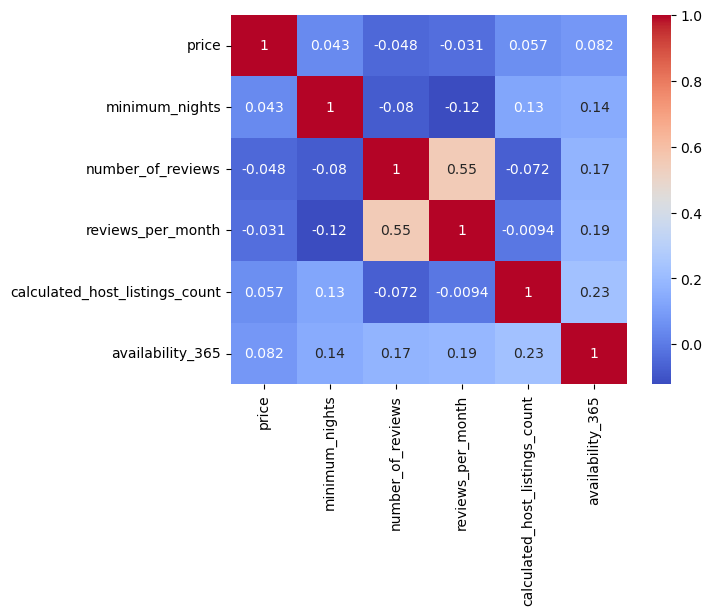

In [18]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


# Tratar esos valores faltantes

In [20]:
df['number_of_reviews'].value_counts()

number_of_reviews
0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
313        1
540        1
480        1
326        1
341        1
Name: count, Length: 394, dtype: int64

Parece que el número 0 de reviews es el mismo que de valores faltantes de las columnas "last_review" y "reviews_per_month". Lo cual tiene sentido.

Vamos a comprobarlo

In [22]:
df_0_reviews = df[df['number_of_reviews'] == 0]
df_0_reviews

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
19,Manhattan,East Harlem,Entire home/apt,190,7,0,NaN,NaN,2,249
26,Manhattan,Inwood,Private room,80,4,0,NaN,NaN,1,0
36,Brooklyn,Bedford-Stuyvesant,Private room,35,60,0,NaN,NaN,1,365
38,Brooklyn,Flatbush,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,NaN,2,9
48891,Brooklyn,Bushwick,Private room,40,4,0,NaN,NaN,2,36
48892,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,NaN,6,2


In [23]:
print(df_0_reviews['last_review'].value_counts())
print(df_0_reviews['reviews_per_month'].value_counts())

Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


Efectivamente, esos valores nulos se deben a que no hay reviews en esas casas por lo tanto no existe la última review y ni hay reviews por mes.

In [25]:
df[df['availability_365'] == 0]

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,2017-10-05,0.40,1,0
8,Manhattan,Upper West Side,Private room,79,2,118,2017-07-21,0.99,1,0
14,Manhattan,West Village,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
20,Brooklyn,Williamsburg,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...
48550,Queens,Ridgewood,Private room,45,1,0,NaN,NaN,1,0
48731,Brooklyn,Park Slope,Entire home/apt,111,8,0,NaN,NaN,1,0
48756,Manhattan,Murray Hill,Entire home/apt,129,2,0,NaN,NaN,1,0
48760,Queens,Sunnyside,Private room,46,1,0,NaN,NaN,1,0


# EDA

C:\Users\pablo\AppData\Local\Temp\ipykernel_4720\4124175371.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x = 'neighbourhood_group', palette='Set2')


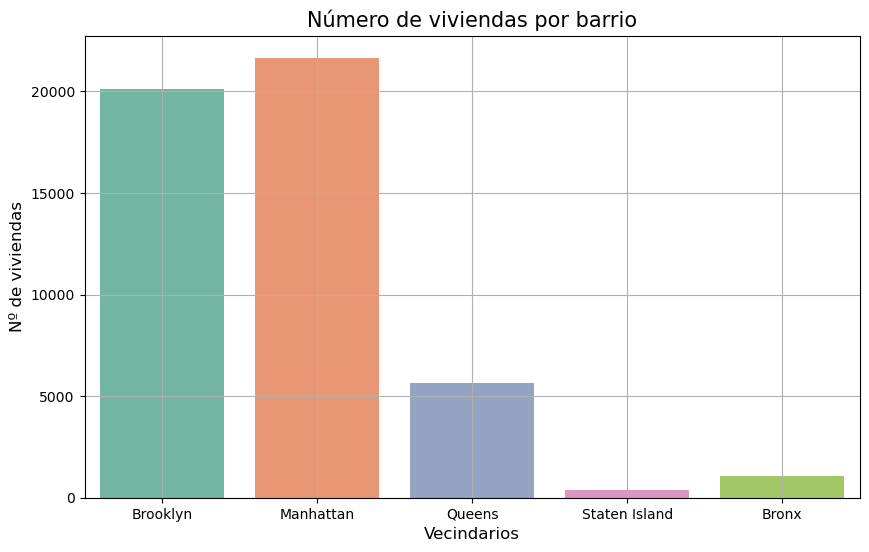

In [27]:
plt.figure(figsize = (10,6))
sns.countplot(data=df, x = 'neighbourhood_group', palette='Set2')
plt.xlabel('Vecindarios', fontsize = 12)
plt.ylabel('Nº de viviendas', fontsize = 12)
plt.title('Número de viviendas por barrio', fontsize = 15)
plt.grid(True)
plt.show()

Vemos que los barrios con más oferta son Brooklyn y Manhattan

C:\Users\pablo\AppData\Local\Temp\ipykernel_4720\3421952054.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x = 'room_type', palette='Set2')


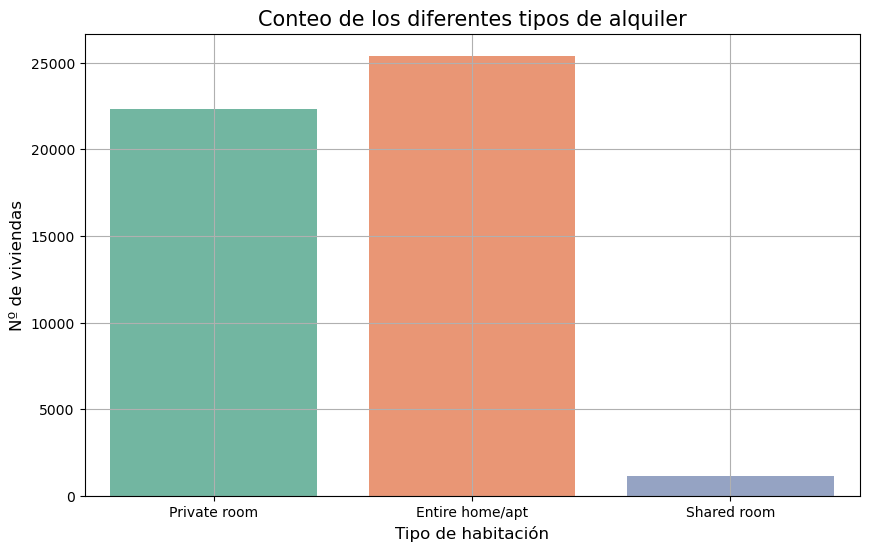

In [29]:
plt.figure(figsize = (10,6))
sns.countplot(data=df, x = 'room_type', palette='Set2')
plt.xlabel('Tipo de habitación', fontsize = 12)
plt.ylabel('Nº de viviendas', fontsize = 12)
plt.title('Conteo de los diferentes tipos de alquiler', fontsize = 15)
plt.grid(True)
plt.show()


### Tanto los apartamentos enteros como las habitaciones privadas son las que más se ofrecen

<Axes: xlabel='price', ylabel='Count'>

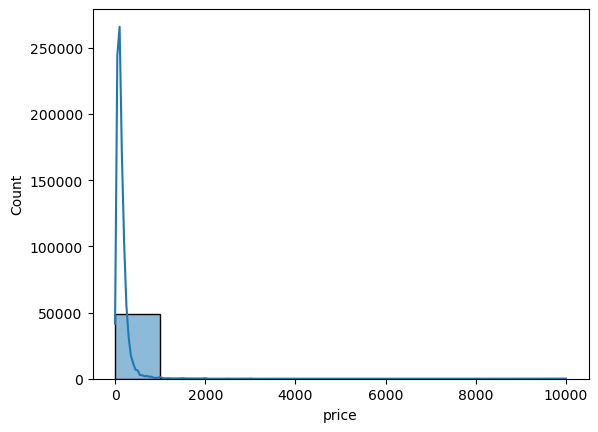

In [31]:
sns.histplot(df['price'], bins=10, kde=True)

En este gráfico observamos que el precio de las ofertas está entre 0 y 1000$ (más o menos)

Dentro de ese rango vemos que la mayoria de precios, con diferencia, están mas cerca del rango 0. 

In [33]:
df.pivot_table(index = 'room_type', columns = 'neighbourhood_group', values = 'price', aggfunc = 'mean')

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,127.506596,178.327545,249.239109,147.050573,173.846591
Private room,66.788344,76.500099,116.776622,71.762456,62.292553
Shared room,59.800000,50.527845,88.977083,69.020202,57.444444


En esta tabla podemos ver la diferencia, en precio medio, de las ofertas que hay por barrio y por tipo de habitación

Los barrios más caros son Brooklyn y Manhattan (los que más ofertas tienen también)

Como casa entera barata, Bronx. 

Habitación privada o compartida, todos los barrios tienen precios similares, salvo Manhattan que son más caros.

En algunos casos, la habitación privada es más barata que la compartida

In [35]:
df.pivot_table(index = 'room_type', columns = 'neighbourhood_group', values = 'price', aggfunc = 'count')

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,379,9559,13199,2096,176
Private room,652,10132,7982,3372,188
Shared room,60,413,480,198,9


Aquí se ve cuantas ofertas hay por barrio y tipo de habitación.

A pesar de que Brooklym sea el 2 barrio más caro, al tener tanta oferta en habitación privada, su precio se encuentra cercano a los barrios con precios más bajos

Las habitaciones compartidas son las menos ofertadas en todos los barrios

<Axes: xlabel='room_type', ylabel='price'>

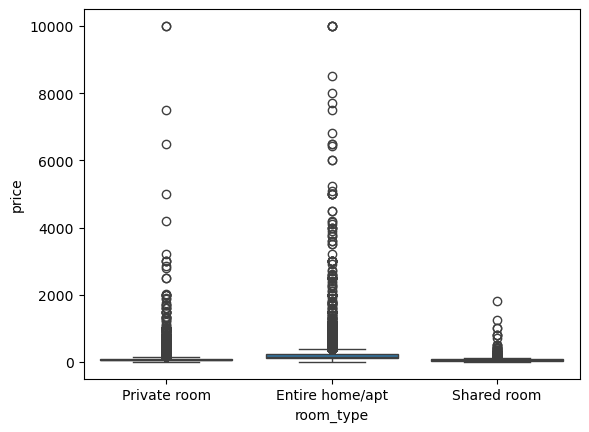

In [37]:
sns.boxplot(data=df, x='room_type', y='price')

Vemos que existen precios extremos e inusuales. 

Pueden distorsionar el análisis

Se valora eliminar los precios extremos o filtrar <1000$

<Axes: xlabel='room_type', ylabel='minimum_nights'>

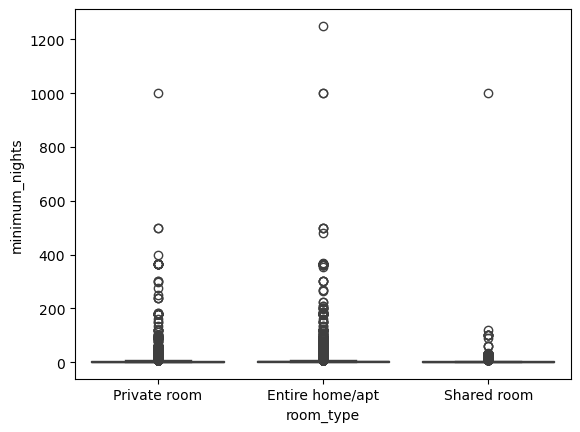

In [39]:
sns.boxplot(data=df, x='room_type', y='minimum_nights')

También se observan valores inusuales. Mínimo de 1000 o 1200 noches es ruido para el análisis. 

La mayoria están entre 1 y 10 noches, lo esperable. 

Podemos eliminar los datos inusuales o filtrar por >365 o >100.

<Axes: xlabel='number_of_reviews', ylabel='price'>

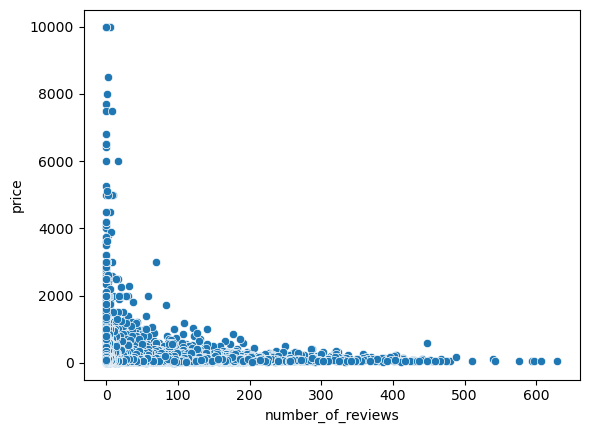

In [41]:
sns.scatterplot(data=df, x='number_of_reviews', y='price')


Relación nula entre número de reviews y precio: no parece que los alojamientos con más opiniones sean más caros.

El precio no depende directamente del número de reseñas. Pero sí se observa que los alojamientos más caros suelen tener pocas reseñas.

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

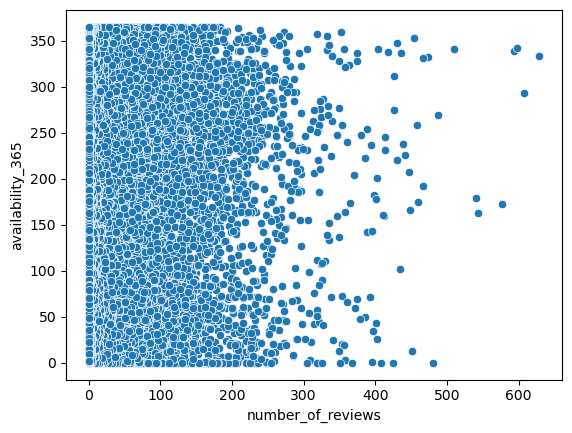

In [43]:
sns.scatterplot(data=df, x='number_of_reviews', y='availability_365')


Muchos alojamientos tienen disponibilidad completa (365 días) y gran número de reviews → podrían ser negocios activos.

También hay muchos con 0–100 días disponibles al año y pocos reviews → posiblemente usuarios ocasionales.


# Después de este primer análisis, voy a eliminar los outliers de precios extremos y de noches mínimas inusuales.

Decido filtrar a precios menores de 500, puesto que el 75% de los datos están por debajo de 175$ (ver en analisis estadístico)

Filtro también por menos de 30 como mínimo de noches (equivale al mes) y el 75% de datos está por debajo de 5 noches.

In [46]:
df_clean = df[(df['price'] < 500) & (df['minimum_nights'] < 30)]
df_clean

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,NaN,2,9
48891,Brooklyn,Bushwick,Private room,40,4,0,NaN,NaN,2,36
48892,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,NaN,6,2


Se han eliminado 5612 filas. Un 11% de datos

C:\Users\pablo\AppData\Local\Temp\ipykernel_4720\548303391.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x = 'neighbourhood_group', palette='Set2')


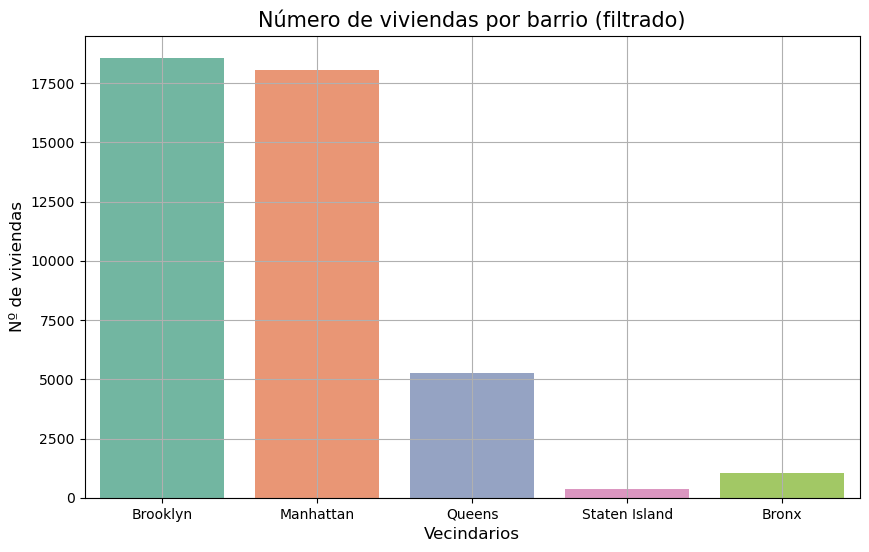

In [48]:
plt.figure(figsize = (10,6))
sns.countplot(data=df_clean, x = 'neighbourhood_group', palette='Set2')
plt.xlabel('Vecindarios', fontsize = 12)
plt.ylabel('Nº de viviendas', fontsize = 12)
plt.title('Número de viviendas por barrio (filtrado)', fontsize = 15)
plt.grid(True)
plt.show()

Vemos que Brooklyn y Manhattan son otra vez los barrios que más ofrecen casas. 

Ahora Brooklyn es la primera, puede ser debido a que la mayoria de outliers estaban en Manhattan, que debe ser el bariio más CARO

C:\Users\pablo\AppData\Local\Temp\ipykernel_4720\3985162554.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x = 'room_type', palette='Set2')


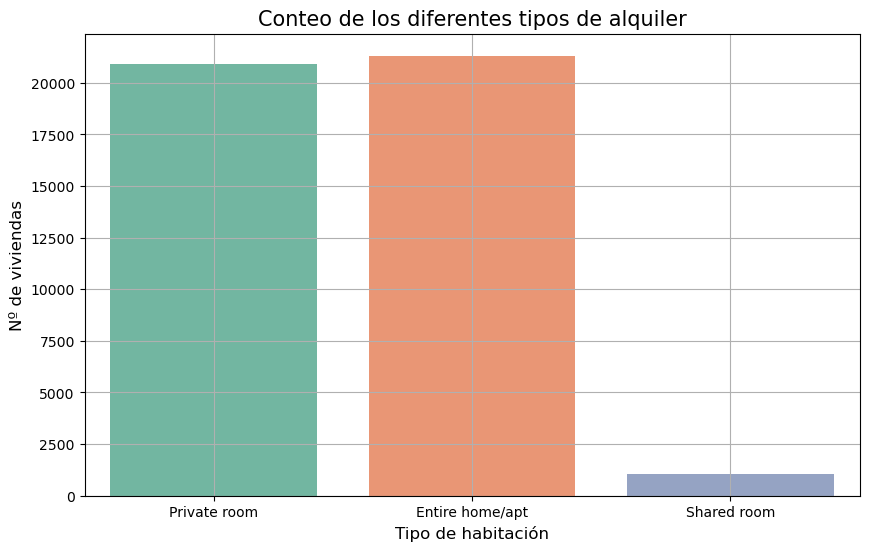

In [50]:
plt.figure(figsize = (10,6))
sns.countplot(data=df_clean, x = 'room_type', palette='Set2')
plt.xlabel('Tipo de habitación', fontsize = 12)
plt.ylabel('Nº de viviendas', fontsize = 12)
plt.title('Conteo de los diferentes tipos de alquiler', fontsize = 15)
plt.grid(True)
plt.show()


Aquí vemos que la mayoria de outliers eran de casas privadas puesto que se ha alineado más con la habitación privada.

Siguen siendo, con mucha diferencia, las ofertas mayoritarias del dataset.

In [52]:
df_clean['room_type'].value_counts()

room_type
Entire home/apt    21310
Private room       20930
Shared room         1043
Name: count, dtype: int64

<Axes: xlabel='price', ylabel='Count'>

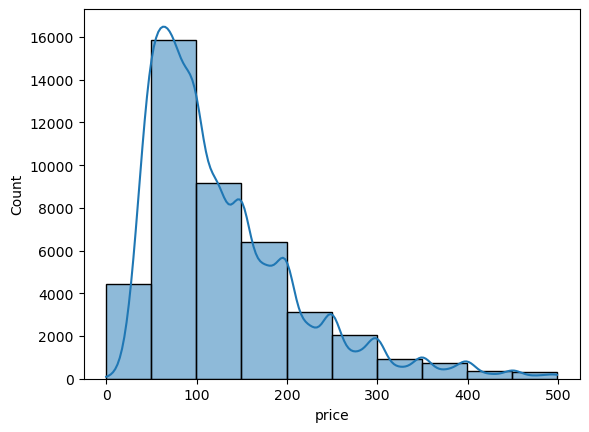

In [53]:
sns.histplot(df_clean['price'], bins=10, kde=True)

Se puede ver más claro la distrivución de los precios, teniendo el precio más comun entre 50 y 100$.

In [55]:
df_clean.pivot_table(index = 'room_type', columns = 'neighbourhood_group', values = 'price', aggfunc = 'mean')

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,123.002817,159.033801,201.919605,139.045132,125.137500
Private room,61.167987,71.795555,103.924139,68.415252,62.715084
Shared room,47.637931,52.049853,83.087912,47.994444,57.444444


En el Bronx ha subido el precio de todas las ofertas un poco.

En Brooklyn sube el precio de Casa entera y habitación privada, pero baja un poco el de habitación compartida

En Manhattan ha subido el precio de todas las ofertas, a pesar de los outliers que tenían.

En Queens ha bajado el precio de todas las ofertas.

En Staten Island ha subido el precio bastante en la Casa entera. En el resto, se ha mantenido.


In [57]:
df_clean.pivot_table(index = 'room_type', columns = 'neighbourhood_group', values = 'price', aggfunc = 'count')

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,355,8698,10125,1972,160
Private room,631,9538,7461,3121,179
Shared room,58,341,455,180,9


En el Bronx ha bajado el número de ofertas un poco.

En Brookly también ha bajado pero bastantes más. 

En Manhattan también y sería el barrio que más oferta ha perdido después del filtrado.

En Queens ha bajado también pero muy poco.

En Staten Island sería el barrio que menos ha bajado el número de ofertas. 


<Axes: xlabel='room_type', ylabel='price'>

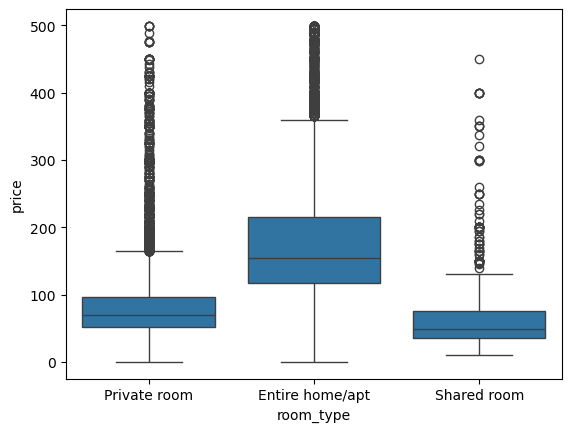

In [59]:
sns.boxplot(data=df_clean, x='room_type', y='price')


<Axes: ylabel='price'>

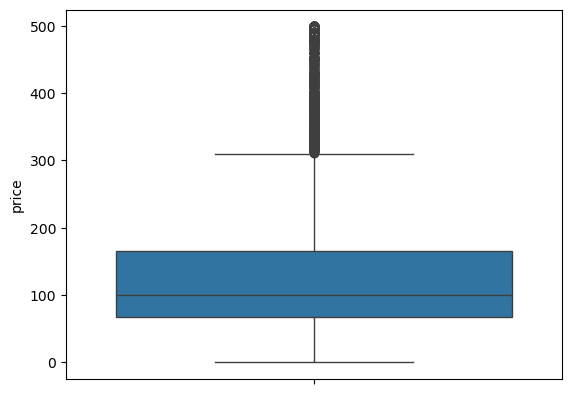

In [60]:
sns.boxplot(data=df_clean, y='price')

<Axes: ylabel='minimum_nights'>

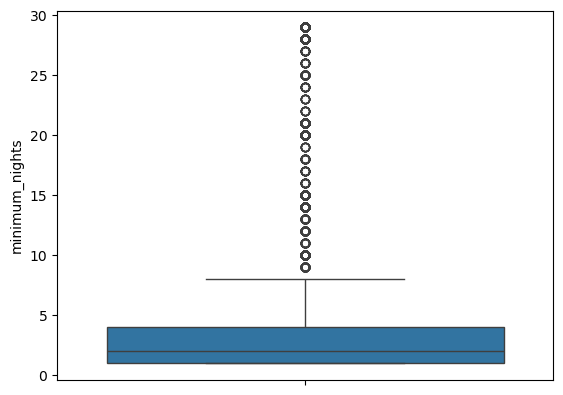

In [61]:
sns.boxplot(data=df_clean, y='minimum_nights')

Se han reducido mucho los outliers. Ahora se ve claramente los cuerpos del boxplot. 

Esos outliers son inevitables y siempre en el tema de la vivienda van a existir. El % que suponen ahora mismo es bajo.

Vemos que los precios más altos son los de la casa entera, seguida de la habitación privada. 

Se ha reducido el ruido. 


<Axes: xlabel='room_type', ylabel='minimum_nights'>

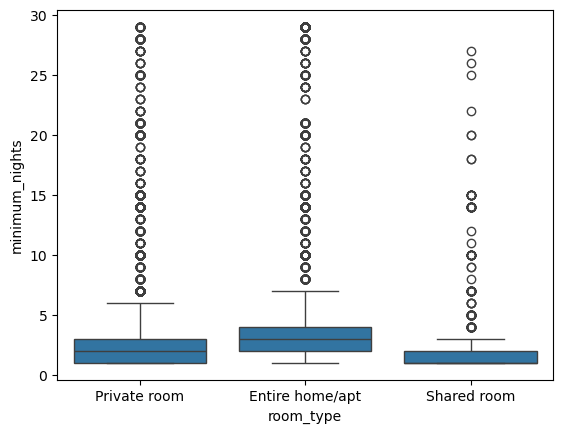

In [63]:
sns.boxplot(data=df_clean, x='room_type', y='minimum_nights')

Aquí también se ha reducido sustancialmente el ruido y vemos que existen muy pocos outliers (en torno 15-20/habitación)

Se observa que donde se exige un mayor número mínima de noches es en el apartamento entero, seguido de la habitacón privada.

<Axes: xlabel='number_of_reviews', ylabel='price'>

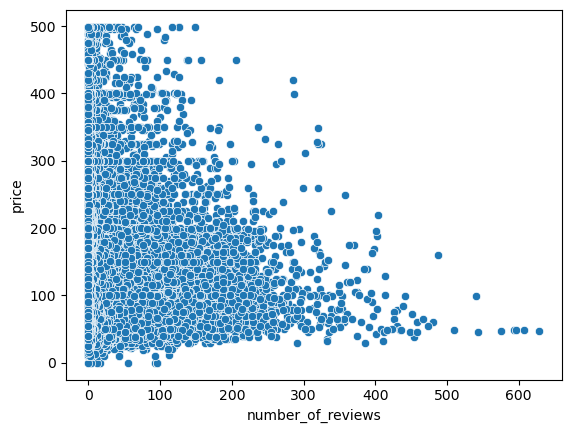

In [65]:
sns.scatterplot(data=df_clean, x='number_of_reviews', y='price')


Después de filtrar, se puede observar que los apartamentos más baratos son los que más reseñas tienen.

Seguramente sean los que más se alquilen.

A mayor precio, menos reseñas.

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

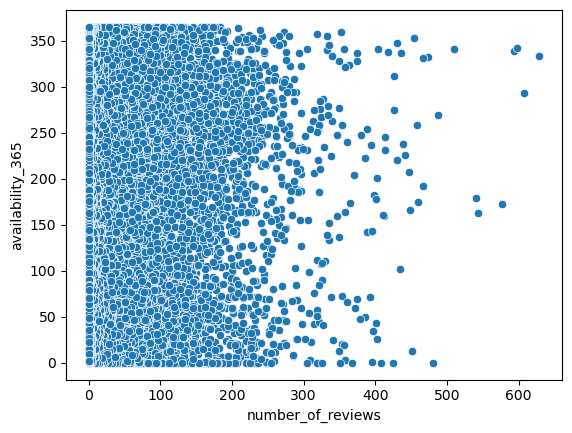

In [67]:
sns.scatterplot(data=df, x='number_of_reviews', y='availability_365')


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

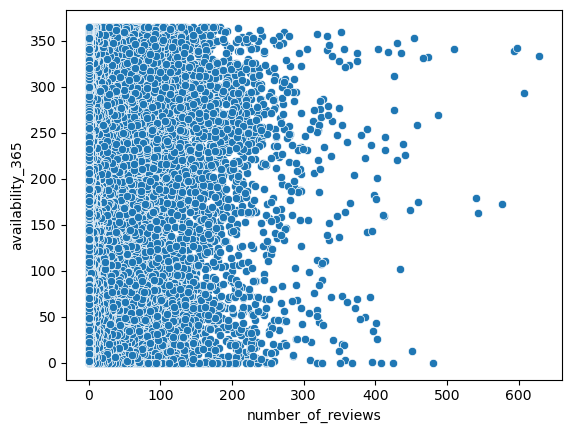

In [68]:
sns.scatterplot(data=df_clean, x='number_of_reviews', y='availability_365')


En este gráfico de dispersión no hay prácticamente diferencias con los datos no filtrados

Se destaca lso alojamientos con disponibilidad completa (365 días) y su gran número de reviews → podrían ser negocios activos.

Lo mismo para aquellos con 0–100 días disponibles al año y pocos reviews → posiblemente usuarios ocasionales

# Modelos

Estandarizar los valores numericos

Convertir las variables categoricas o de datetime en numéricas

In [72]:
df_clean.head(5)

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [73]:
# convertir la columna de datetime en tiempo desde la ultima review
df_clean['last_review'] = pd.to_datetime(df_clean['last_review'])
df_clean['days_since_last_review'] = (pd.to_datetime('today') - df_clean['last_review']).dt.days
df_clean['reviews_per_month'] = df_clean['reviews_per_month'].fillna(0)
df_clean.head(5)

C:\Users\pablo\AppData\Local\Temp\ipykernel_4720\2184699867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['last_review'] = pd.to_datetime(df_clean['last_review'])
C:\Users\pablo\AppData\Local\Temp\ipykernel_4720\2184699867.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['days_since_last_review'] = (pd.to_datetime('today') - df_clean['last_review']).dt.days
C:\Users\pablo\AppData\Local\Temp\ipykernel_4720\2184699867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review
0,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365,2437.0
1,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2223.0
2,Manhattan,Harlem,Private room,150,3,0,NaT,0.00,1,365,NaN
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2178.0
4,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2406.0


In [74]:
df_clean['days_since_last_review'] = df_clean['days_since_last_review'].fillna(0)

C:\Users\pablo\AppData\Local\Temp\ipykernel_4720\934295819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['days_since_last_review'] = df_clean['days_since_last_review'].fillna(0)


In [75]:
df_clean = df_clean.drop(columns = ['last_review'], axis =1)
df_clean.head(5)

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365,2437.0
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355,2223.0
2,Manhattan,Harlem,Private room,150,3,0,0.00,1,365,0.0
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194,2178.0
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0,2406.0


In [76]:
# Convertir las categoricas en numericas con One-hot
df_clean = df_clean.drop(columns = ['neighbourhood'])
columnas_cat = ['neighbourhood_group', 'room_type']
df_clean = pd.get_dummies(df_clean, columns=columnas_cat, drop_first=True)
df_clean.head(5)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,149,1,9,0.21,6,365,2437.0,True,False,False,False,True,False
1,225,1,45,0.38,2,355,2223.0,False,True,False,False,False,False
2,150,3,0,0.00,1,365,0.0,False,True,False,False,True,False
3,89,1,270,4.64,1,194,2178.0,True,False,False,False,False,False
4,80,10,9,0.10,1,0,2406.0,False,True,False,False,False,False


In [77]:
#Estandarizar las numericas
from sklearn.preprocessing import StandardScaler
columnas_scale = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'days_since_last_review']
scale = StandardScaler()
scale.fit(df_clean[columnas_scale])
data_scale = scale.transform(df_clean[columnas_scale])
df_clean[columnas_scale] = data_scale
df_clean.head(5)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,0.245354,-0.590589,-0.349027,-0.588666,0.054296,2.111825,0.425165,True,False,False,False,True,False
1,1.149575,-0.590589,0.429660,-0.485684,-0.088508,2.032238,0.214701,False,True,False,False,False,False
2,0.257252,-0.118608,-0.543699,-0.715878,-0.124209,2.111825,-1.971566,False,True,False,False,True,False
3,-0.468504,-0.590589,5.296458,2.094909,-0.124209,0.750883,0.170444,True,False,False,False,False,False
4,-0.575583,1.533322,-0.349027,-0.655301,-0.124209,-0.793110,0.394677,False,True,False,False,False,False


# Regresion

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = df_clean.drop(columns=['price'])
y = df_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


MSE: 0.60
R² Score: 0.41


El modelo es muy mejorable

# Random Forest

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
X = df_clean.drop(columns=['price'])
y = df_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

MSE: 0.59
R² Score: 0.42


# XGBoost

In [225]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
X = df_filtrado.drop(columns=['price'])
y = df_filtrado['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)

model = XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

MSE: 0.52
R² Score: 0.48


In [226]:
resultados = {
    'LinearRegression': {'MSE': 0.53, 'R2': 0.47},
    'RandomForest': {'MSE': 0.54, 'R2': 0.46},
    'XGBoost': {'MSE': 0.52, 'R2': 0.48}
}

df_resultados = pd.DataFrame(resultados).T  # Transpone para que modelos sean filas
print(df_resultados)


                   MSE    R2
LinearRegression  0.53  0.47
RandomForest      0.54  0.46
XGBoost           0.52  0.48


# R2 parecidos, pero sigue sin explicar mas del 40%

Puede que el problema esté en los outliers, voy a filtrar de nuevo

In [84]:
df_filtrado = df[(df['price'] < 300) & (df['minimum_nights'] < 8)]
df_filtrado

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,Manhattan,Murray Hill,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...
48889,Queens,Jamaica,Private room,65,1,0,NaN,NaN,2,163
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,NaN,2,9
48891,Brooklyn,Bushwick,Private room,40,4,0,NaN,NaN,2,36
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,NaN,6,2


C:\Users\pablo\AppData\Local\Temp\ipykernel_4720\3269453053.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtrado, x = 'neighbourhood_group', palette='Set2')


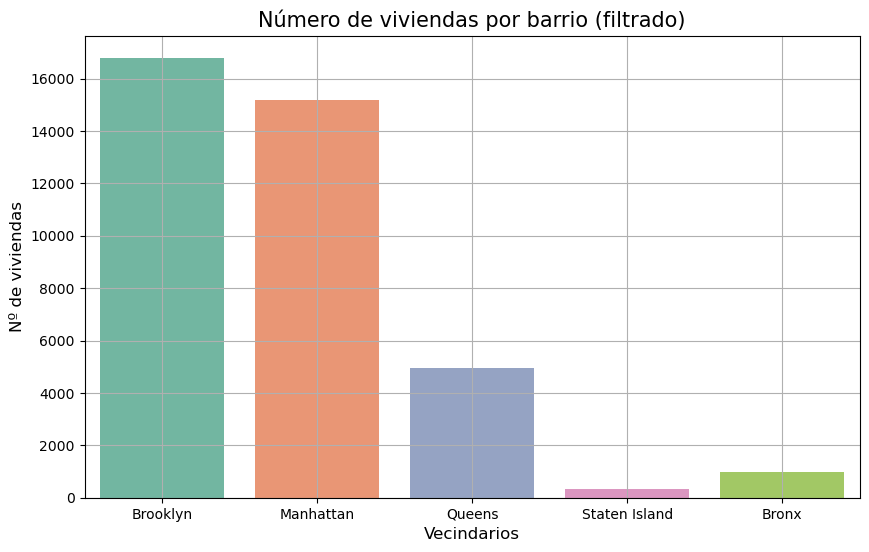

In [86]:
plt.figure(figsize = (10,6))
sns.countplot(data=df_filtrado, x = 'neighbourhood_group', palette='Set2')
plt.xlabel('Vecindarios', fontsize = 12)
plt.ylabel('Nº de viviendas', fontsize = 12)
plt.title('Número de viviendas por barrio (filtrado)', fontsize = 15)
plt.grid(True)
plt.show()

C:\Users\pablo\AppData\Local\Temp\ipykernel_4720\3943669796.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtrado, x = 'room_type', palette='Set2')


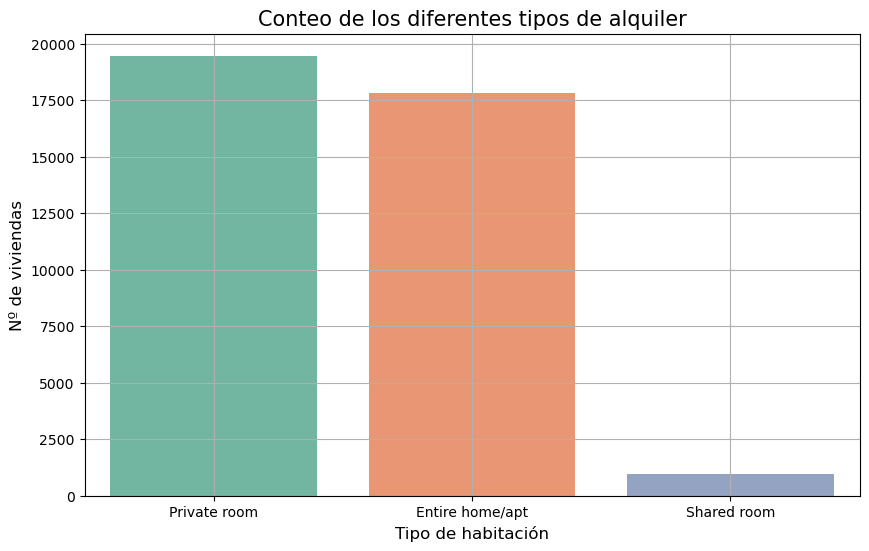

In [87]:
plt.figure(figsize = (10,6))
sns.countplot(data=df_filtrado, x = 'room_type', palette='Set2')
plt.xlabel('Tipo de habitación', fontsize = 12)
plt.ylabel('Nº de viviendas', fontsize = 12)
plt.title('Conteo de los diferentes tipos de alquiler', fontsize = 15)
plt.grid(True)
plt.show()


<Axes: xlabel='price', ylabel='Count'>

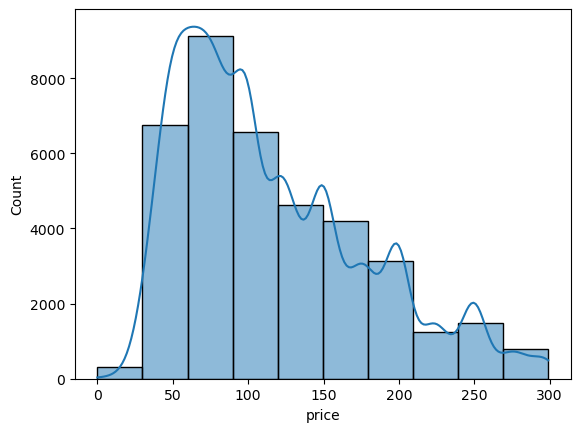

In [88]:
sns.histplot(df_filtrado['price'], bins=10, kde=True)

In [89]:
df_filtrado.pivot_table(index = 'room_type', columns = 'neighbourhood_group', values = 'price', aggfunc = 'mean')

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,111.330303,145.708618,175.964092,130.549834,118.064935
Private room,60.333333,71.554516,98.875749,67.548854,61.862069
Shared room,49.145455,51.555556,76.632603,46.717514,57.444444


In [90]:
df_filtrado.pivot_table(index = 'room_type', columns = 'neighbourhood_group', values = 'price', aggfunc = 'count')

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,330,7612,7937,1806,154
Private room,615,8869,6841,2968,174
Shared room,55,315,411,177,9


<Axes: xlabel='room_type', ylabel='price'>

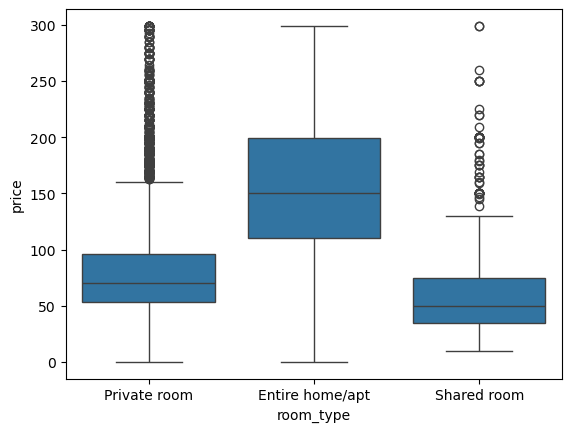

In [91]:
sns.boxplot(data=df_filtrado, x='room_type', y='price')


<Axes: xlabel='room_type', ylabel='minimum_nights'>

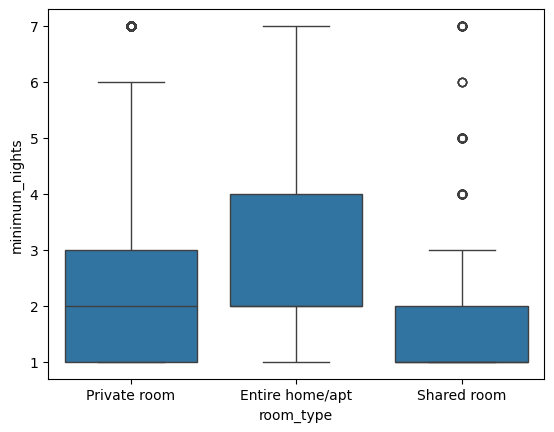

In [92]:
sns.boxplot(data=df_filtrado, x='room_type', y='minimum_nights')


<Axes: xlabel='number_of_reviews', ylabel='price'>

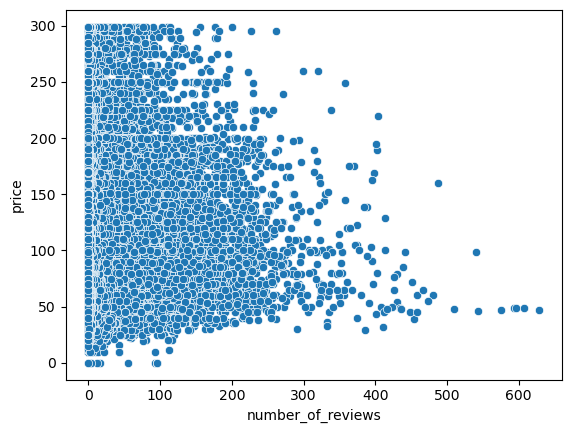

In [93]:
sns.scatterplot(data=df_filtrado, x='number_of_reviews', y='price')

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

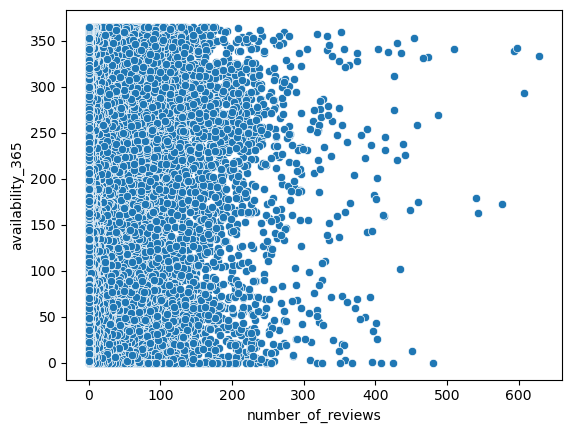

In [94]:
sns.scatterplot(data=df_filtrado, x='number_of_reviews', y='availability_365')

# Modelo

In [96]:
# convertir la columna de datetime en tiempo desde la ultima review
df_filtrado['last_review'] = pd.to_datetime(df_filtrado['last_review'])
df_filtrado['days_since_last_review'] = (pd.to_datetime('today') - df_filtrado['last_review']).dt.days
df_filtrado['reviews_per_month'] = df_filtrado['reviews_per_month'].fillna(0)
df_filtrado['days_since_last_review'] = df_filtrado['days_since_last_review'].fillna(0)
df_filtrado = df_filtrado.drop(columns = ['last_review'], axis =1)

# Convertir las categoricas en numericas con One-hot
df_filtrado = df_filtrado.drop(columns = ['neighbourhood'])
columnas_cat = ['neighbourhood_group', 'room_type']
df_filtrado = pd.get_dummies(df_filtrado, columns=columnas_cat, drop_first=True)

#Estandarizar las numericas
from sklearn.preprocessing import StandardScaler
columnas_scale = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'days_since_last_review']
scale = StandardScaler()
scale.fit(df_filtrado[columnas_scale])
data_scale = scale.transform(df_filtrado[columnas_scale])
df_filtrado[columnas_scale] = data_scale
df_filtrado.head(5)

C:\Users\pablo\AppData\Local\Temp\ipykernel_4720\1913384393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['last_review'] = pd.to_datetime(df_filtrado['last_review'])
C:\Users\pablo\AppData\Local\Temp\ipykernel_4720\1913384393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['days_since_last_review'] = (pd.to_datetime('today') - df_filtrado['last_review']).dt.days
C:\Users\pablo\AppData\Local\Temp\ipykernel_4720\1913384393.py:4: SettingWithCopyWarning: 
A value is trying to b

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,0.540069,-0.961989,-0.372619,-0.614871,0.145312,2.151076,0.399849,True,False,False,False,True,False
1,1.760095,-0.961989,0.378756,-0.514411,-0.055619,2.070731,0.182430,False,True,False,False,False,False
2,0.556122,0.262753,-0.560463,-0.738968,-0.105852,2.151076,-2.076084,False,True,False,False,True,False
3,-0.423109,-0.961989,5.074853,2.003001,-0.105852,0.777177,0.136711,True,False,False,False,False,False
5,1.358771,0.262753,0.984031,-0.390313,-0.105852,0.254935,0.149919,False,True,False,False,False,False


# Regresion

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = df_filtrado.drop(columns=['price'])
y = df_filtrado['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


MSE: 0.53
R² Score: 0.47


# Random Forest

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
X = df_filtrado.drop(columns=['price'])
y = df_filtrado['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

MSE: 0.54
R² Score: 0.46


# XGBoost

In [173]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
X = df_filtrado.drop(columns=['price'])
y = df_filtrado['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)

model = XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

MSE: 0.52
R² Score: 0.48


In [185]:
resultados = {
    'LinearRegression': {'MSE': 0.53, 'R2': 0.47},
    'RandomForest': {'MSE': 0.54, 'R2': 0.46},
    'XGBoost': {'MSE': 0.52, 'R2': 0.48}
}

df_resultados = pd.DataFrame(resultados).T  # Transpone para que modelos sean filas
print(df_resultados)


                   MSE    R2
LinearRegression  0.53  0.47
RandomForest      0.54  0.46
XGBoost           0.52  0.48


# 📌 Conclusión del Análisis del Dataset de Airbnb NYC 2019
Tras un análisis exploratorio exhaustivo del dataset de Airbnb NYC 2019, se identificó una alta presencia de outliers, especialmente en las variables price y minimum_nights, lo que motivó un filtrado de los datos para mejorar la calidad del modelo. Se eliminaron registros con precios superiores a 300$ y estancias mínimas superiores a 8 noches, con el fin de centrarse en ofertas más representativas y realistas del mercado.

Se realizó la ingeniería de variables necesaria:

Conversión de variables categóricas mediante One Hot Encoding.

Transformación de fechas y cálculo de days_since_last_review.

Estandarización de variables numéricas para facilitar el aprendizaje de los modelos lineales.

Posteriormente, se entrenaron tres modelos de regresión distintos con el objetivo de predecir el precio de los alojamientos:

Modelo	             MSE	R² Score
Linear Regression	0.53	0.47
Random Forest	    0.54	0.46
XGBoost	            0.52	0.48

# 🔎 Interpretación:

Ninguno de los modelos logró superar un R² del 0.50, lo que indica que menos del 50% de la variabilidad en el precio puede ser explicada por las variables disponibles.

XGBoost obtuvo el mejor desempeño, aunque de forma marginal.

La presencia de variables importantes ausentes (número de habitaciones, baños, condiciones del alojamiento, demanda en tiempo real, etc.) limita fuertemente la capacidad predictiva de cualquier modelo.

La variable price, además, presenta una alta varianza incluso tras el filtrado, lo que complica su modelado preciso con los datos actuales.

# ✅ Conclusión general:
Este proyecto demuestra la importancia del preprocesamiento de datos, la ingeniería de variables y la comparación de modelos. Si bien los resultados son modestos, reflejan las limitaciones inherentes al dataset. Para mejorar el rendimiento, sería necesario incorporar más variables contextuales o espaciales, como tipo de vivienda, calidad, número de habitaciones o información sobre la competencia en la zona.

